In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
X = pd.read_csv("RedditShortDemoSurvey-2-Cleaned.csv")

In [26]:
X['employment_status'] = X.employment_status.map({'Employed full time':0, 'Student':1,'Not employed, but looking for work':1, 'Freelance':0, 'Not employed and not looking for work':1, 'None':1, 'Retired':1})

In [27]:
y = X.pop("employment_status")

In [28]:
X.describe()
#df.shape

,Entry Id
count,32754.000000
mean,16378.561916
std,9456.272427
min,1.000000
25%,8189.250000
50%,16379.500000
75%,24567.750000
max,32756.000000


In [29]:
X.columns

Index([u'Entry Id', u'Please indicate your gender.',
       u'Please select the category that includes your age.',
       u'What is your marital status?',
       u'Are you or have you ever been in military service?',
       u'Do you currently have children under the age of 18 living in your household?',
       u'What best describes your level of education?',
       u'Treated country data', u'Continent',
       u'Which one of the following ranges includes your total yearly household income before taxes?',
       u'treated subreddit data', u'Are you a dog or a cat person?',
       u'If you were a cheese, what cheese would you be?', u'Unnamed: 14',
       u'(For U. S. redditors) In which state do you live?', u'Unnamed: 16',
       u'Unnamed: 17', u'Unnamed: 18', u'Unnamed: 19'],
      dtype='object')

In [30]:
X.columns = ['entry_id', 'gender', 'age_category', 
             'marital_status', 'military_service', 'children_under_ the_age_of_18_in_your_household', 
             'education_level', 'country', 'continent', 
             'gross_household_income', 'treated_subreddit_data', 'are_you_a_dog_or_a_cat_person', 
              'if_you_were_a_cheese_what_cheese_would_you_be', 'na1', 'state', 
              'na3', 'na4', 'na5', 'na6']

In [31]:
numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
X[numeric_variables].head()

,entry_id
0,18787
1,22086
2,26732
3,30491
4,7402


In [32]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
model.fit(X[numeric_variables], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [33]:
model.oob_score_

-0.47586678401587523

In [34]:
y_oob = model.oob_prediction_
print "c-stat: ", roc_auc_score(y, y_oob)

c-stat:  0.499901629463


In [35]:
# Here is a simple function to show descriptive stats on the categorical variables
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [36]:
describe_categorical(X)

,gender,age_category,marital_status,military_service,children_under_ the_age_of_18_in_your_household,education_level,country,continent,gross_household_income,treated_subreddit_data,are_you_a_dog_or_a_cat_person,if_you_were_a_cheese_what_cheese_would_you_be,na1,state,na3,na4,na5,na6
count,32553,32666,32749,32749,32535,32610,32577,32550,31139,28393,32744,32749,3,20846,1,1,1,1
unique,2,7,6,2,2,7,439,7,8,1832,3,16,3,52,1,1,1,1
top,Male,18-24,Single,No,No,Bachelor's degree,United States,North America,"Under $20,000",askreddit,I like dogs,Other,7/13/2011 15:47,California,I like cats.,Other,7/14/2011 13:22,public
freq,26418,15802,10428,30526,27488,11046,20967,24361,7892,2123,17149,6562,1,3401,1,1,1,1


In [38]:
X.drop(["entry_id", "country", "state", "treated_subreddit_data", "are_you_a_dog_or_a_cat_person", "if_you_were_a_cheese_what_cheese_would_you_be", "na1", "na3", "na4", "na5", "na6"], axis=1, inplace=True)

In [39]:
categorical_variables = ['gender', 'age_category', 'marital_status', 'military_service', 'education_level', 'continent', 'gross_household_income', 'children_under_ the_age_of_18_in_your_household']

for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    X[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [40]:
X

,gender_Female,gender_Male,gender_Missing,age_category_18-24,age_category_25-34,age_category_35-44,age_category_45-54,age_category_55-64,age_category_65 or Above,age_category_Missing,...,"gross_household_income_$20,000 - $29,999","gross_household_income_$30,000 - $39,999","gross_household_income_$40,000 - $49,999","gross_household_income_$50,000 - $69,999","gross_household_income_$70,000 - $99,999",gross_household_income_Missing,"gross_household_income_Under $20,000",children_under_ the_age_of_18_in_your_household_Missing,children_under_ the_age_of_18_in_your_household_No,children_under_ the_age_of_18_in_your_household_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [41]:
# Look at all the columns in the dataset
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(X)

,gender_Female,gender_Male,gender_Missing,age_category_18-24,age_category_25-34,age_category_35-44,age_category_45-54,age_category_55-64,age_category_65 or Above,age_category_Missing,age_category_Under 18,marital_status_Engaged,marital_status_Forever Alone,marital_status_In a relationship,marital_status_Married/civil union/domestic partnership,marital_status_Missing,marital_status_Single,marital_status_Widowed,military_service_Missing,military_service_No,military_service_Yes,education_level_Associate degree,education_level_Bachelor's degree,education_level_Graduate or professional degree,education_level_High school graduate or equivalent,education_level_Missing,education_level_Some college,education_level_Some high school,education_level_Trade or Vocational degree,continent_Africa,continent_Antarctica,continent_Asia,continent_Australia_Oceania,continent_Europe,continent_Missing,continent_North America,continent_South America,"gross_household_income_$100,000 - $149,999","gross_household_income_$150,000 or more","gross_household_income_$20,000 - $29,999","gross_household_income_$30,000 - $39,999","gross_household_income_$40,000 - $49,999","gross_household_income_$50,000 - $69,999","gross_household_income_$70,000 - $99,999",gross_household_income_Missing,"gross_household_income_Under $20,000",children_under_ the_age_of_18_in_your_household_Missing,children_under_ the_age_of_18_in_your_household_No,children_under_ the_age_of_18_in_your_household_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32749,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32750,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
32751,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
32752,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)
print "C-stat: ", roc_auc_score(y, model.oob_prediction_)

C-stat:  0.863555724512


In [43]:
model.feature_importances_

array([  1.44139573e-02,   1.19485015e-02,   2.17031739e-03,
         4.06213354e-03,   2.76509607e-01,   1.37032125e-01,
         2.77380798e-02,   2.59852967e-03,   1.59036898e-03,
         6.25285401e-04,   1.58242221e-02,   8.78652290e-03,
         1.43171167e-02,   1.56655215e-02,   2.23212639e-02,
         7.79778738e-05,   1.50317314e-02,   8.91068978e-04,
         6.96788863e-05,   1.04586239e-02,   1.05009321e-02,
         7.26227547e-03,   4.89435297e-02,   1.75786097e-02,
         8.51863595e-03,   9.69233244e-04,   1.48247009e-02,
         4.09311180e-03,   8.32814807e-03,   2.03442414e-03,
         3.59074166e-05,   1.07502118e-02,   1.10976382e-02,
         1.58656988e-02,   3.29577005e-03,   1.97333939e-02,
         5.35961751e-03,   8.42413827e-03,   9.92959715e-03,
         2.48201334e-02,   1.64326825e-02,   1.15137638e-02,
         1.14910361e-02,   7.02673139e-03,   1.20794808e-02,
         9.97876849e-02,   2.04520952e-03,   1.29615009e-02,
         1.21635680e-02]

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:41: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


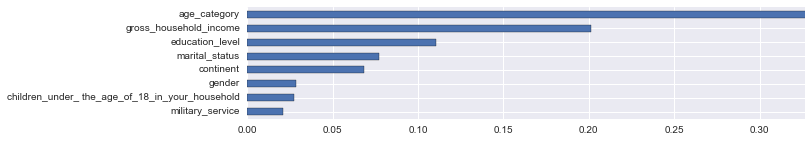

In [44]:
# Complex version that shows the summary view

def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    """
    By Mike Bernico
    
    Graphs the feature importances of a random decision forest using a horizontal bar chart. 
    Probably works but untested on other sklearn.ensembles.
    
    Parameters
    ----------
    ensemble = Name of the ensemble whose features you would like graphed.
    feature_names = A list of the names of those featurs, displayed on the Y axis.
    autoscale = True (Automatically adjust the X axis size to the largest feature +.headroom) / False = scale from 0 to 1
    headroom = used with autoscale, .05 default
    width=figure width in inches
    summarized_columns = a list of column prefixes to summarize on, for dummy variables (e.g. ["day_"] would summarize all day_ vars
    """
    
    if autoscale:
        x_scale = model.feature_importances_.max()+ headroom
    else:
        x_scale = 1
    
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns: 
        #some dummy columns need to be summarized
        for col_name in summarized_columns: 
            #sum all the features that contain col_name, store in temp sum_value
            sum_value = sum(x for i, x in feature_dict.iteritems() if col_name in i )  
            
            #now remove all keys that are part of col_name
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            #lastly, read the summarized field
            feature_dict[col_name] = sum_value
        
    results = pd.Series(feature_dict.values(), index=feature_dict.keys())
    results.sort(axis=1)
    results.plot(kind="barh", figsize=(width,len(results)/4), xlim=(0,x_scale))
    
graph_feature_importances(model, X.columns, summarized_columns=categorical_variables)

In [45]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)

1 loop, best of 3: 57.2 s per loop


30 trees
C-stat:  0.861158619296

50 trees
C-stat:  0.862705716001

100 trees
C-stat:  0.863555724512

200 trees
C-stat:  0.864181473642

500 trees
C-stat:  0.86447072831

1000 trees
C-stat:  0.864494665302

2000 trees
C-stat:  0.864627658955



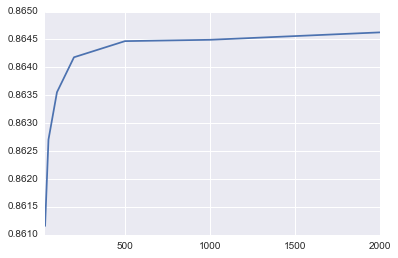

In [46]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X, y)
    print trees, "trees"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();

auto option
C-stat:  0.864494665302

None option
C-stat:  0.864494665302

sqrt option
C-stat:  0.866222915031

log2 option
C-stat:  0.866298805351

0.9 option
C-stat:  0.864828874809

0.2 option
C-stat:  0.866266720865



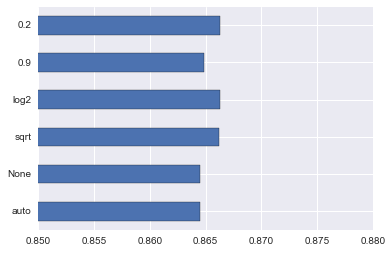

In [47]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X, y)
    print max_features, "option"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.85,.88));

1 min samples
C-stat:  0.864494665302

2 min samples
C-stat:  0.871914189107

3 min samples
C-stat:  0.874908034795

4 min samples
C-stat:  0.876651702835

5 min samples
C-stat:  0.877717162931

6 min samples
C-stat:  0.878543752995

7 min samples
C-stat:  0.879160880852

8 min samples
C-stat:  0.879603887748

9 min samples
C-stat:  0.879979416686

10 min samples
C-stat:  0.880264472634



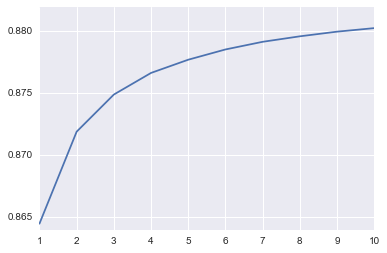

In [48]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model.fit(X, y)
    print min_samples, "min samples"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, min_samples_leaf_options).plot();

In [49]:
model = RandomForestRegressor(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features="auto", 
                              min_samples_leaf=5)
model.fit(X, y)
roc = roc_auc_score(y, model.oob_prediction_)
print "C-stat: ", roc

C-stat:  0.877717162931


<strong>Grid Search</strong>

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [51]:
n_estimators = [300,400,500]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [3,5,7]

from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

In [52]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [54]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
best_rfc = estimator.best_estimator_

In [56]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  0.807662952221


In [57]:
y_hat = best_rfc.predict(X_test)

In [58]:
y_hat

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [59]:
y_test

31911    1
19394    0
2231     0
13719    1
18483    0
28608    0
5665     0
15933    1
18530    0
3673     0
32003    0
30290    1
23565    1
5403     0
8993     1
5824     1
14398    0
30908    0
10359    0
21855    1
6128     1
23141    0
22628    0
18005    0
30580    1
3707     1
20077    0
8824     0
15400    1
3448     0
        ..
7286     0
11828    0
16487    0
15647    0
20553    1
29501    1
22655    1
9061     0
2332     1
22037    1
12584    0
24969    0
27519    1
30833    0
8979     1
11118    0
29647    1
10923    1
23367    1
31087    0
10479    0
14967    1
2145     0
18223    0
9728     1
17840    0
28924    0
22505    0
22402    0
9723     1
Name: employment_status, dtype: int64

In [60]:
correct = 0
total = y_test.shape[0]
for pred_val, truth_val in zip(y_hat, y_test):
    if pred_val == truth_val:
        correct +=1

print correct / float(total)

0.807662952221


In [61]:
print classification_report(y_test, best_rfc.predict(X_test))

             precision    recall  f1-score   support

          0       0.82      0.79      0.81      3318
          1       0.80      0.82      0.81      3233

avg / total       0.81      0.81      0.81      6551



In [62]:
print confusion_matrix(y_test, best_rfc.predict(X_test))

[[2637  681]
 [ 579 2654]]


Precision: 2654 / 2654 + 681 = .80<br>
Recall: 2654 / 2654 + 579 = .82

In [63]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print "AUC Score: ", roc

AUC Score:  0.877883702706


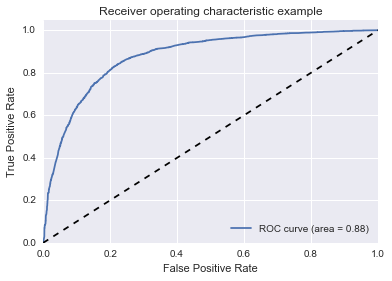

In [64]:
fpr, tpr, thresholds = roc_curve(y_test, best_rfc.predict_proba(X_test)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [65]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(best_rfc, X, y, cv=10)

In [66]:
scores

array([ 0.79859628,  0.7699115 ,  0.75908397,  0.80152672,  0.83267176,
        0.82137405,  0.81679389,  0.81160305,  0.81099237,  0.81679389])

In [67]:
import math
%pylab inline

mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)

Populating the interactive namespace from numpy and matplotlib
Score is 0.803935 +/-  0.015627
95 percent probability that if this experiment were repeated over and over the average score would be between 0.788308 and 0.819562


In [71]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)
print "C-stat: ", roc_auc_score(y_test, model.predict(X_test))

 C-stat:  0.930004808385


print "C-stat: ", roc_auc_score(y_train, model.predict(X_train))<br>
C-stat: 0.926894257092

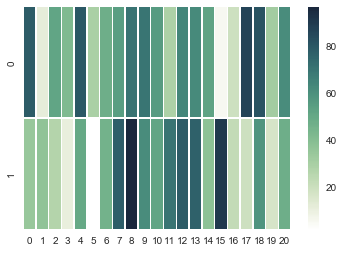

In [78]:
import random

X = pd.DataFrame()
X['X'] = random.sample(range(1,100), 21)
X['y']= random.sample(range(1,100), 21)

cr = sns.cubehelix_palette(as_cmap=True, rot=-.5, light=1)
sns.heatmap([X.y, X.X], linewidth=.5,cmap=cr)